In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# 使用 rc 方法进行全局配置
# 1. 将全局的图像默认大小设置为5×5
plt.rc('figure', figsize=(12, 12))
# 2. 设置字体
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : '12'}
plt.rc('font', **font_options)
# subplot 边距设置为 0
plt.subplots_adjust(wspace=0, hspace=0)

<Figure size 864x864 with 0 Axes>

In [21]:
# 加载性能测试数据集，要访问多个表单使用ExcelFile会更快
xlsx = pd.ExcelFile("~/Downloads/t.xls")
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
qps = pd.read_excel(xlsx, "qps", index_col=0)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# qps["end_time"] = qps["end_time"].apply(lambda x: x + 1)
gpu = pd.read_excel(xlsx, "gpu")
cpu_mem = pd.read_excel(xlsx, "cpu_mem")
qps.index

Float64Index([1595586033.3688793, 1595586033.4119792, 1595586098.6116257,
              1595586100.1581519, 1595586156.8269873, 1595586174.8276892,
              1595586197.0063212, 1595586244.9009132, 1595586261.8973153,
              1595586311.5658224, 1595586332.6535938, 1595586380.0070212,
              1595586390.5633044, 1595586436.0880125,  1595586454.744883,
              1595586488.9145033, 1595586506.3732195, 1595586571.9764206,
              1595586592.0092926, 1595586645.8184662, 1595586664.4434946,
              1595586699.4684155, 1595586729.2332716, 1595586773.5345814,
              1595586797.7926676, 1595586838.9291644, 1595586854.8804631,
              1595586908.0429163,   1595586918.01359, 1595586988.9151454,
               1595586996.481891],
             dtype='float64', name='start_time')

In [22]:
# convert index to timestamp
import datetime
qps.index = qps.index.map(lambda x: datetime.datetime.fromtimestamp(x))
# https://stackoverflow.com/questions/46839032/grouping-by-date-range-with-pandas
# https://stackoverflow.com/questions/36681945/group-dataframe-in-5-minute-intervals
# qps.groupby(pd.TimeGrouper('5Min')).sum()
qps

AttributeError: module 'pandas' has no attribute 'TimeGrouper'

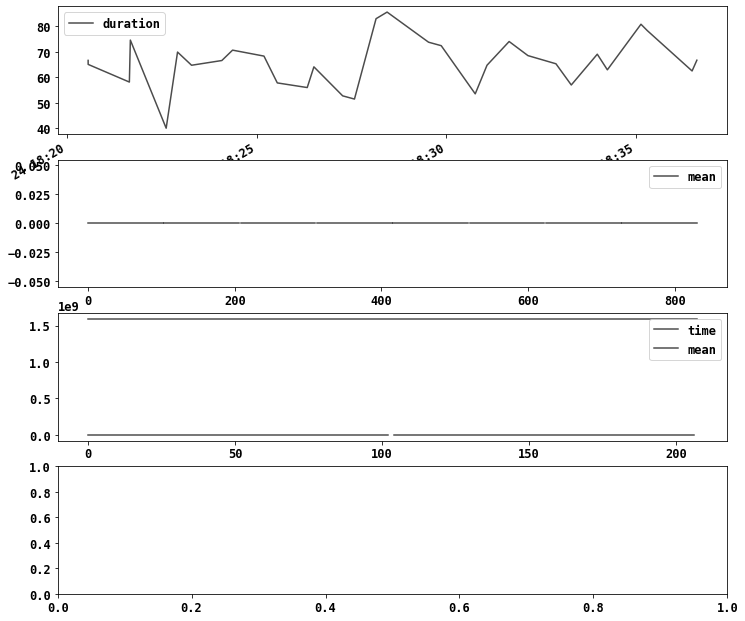

In [23]:
# https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.line.html
# qps.plot.line(y="worker_id")
fig, axes = plt.subplots(4, 1)

qps.plot.line(ax=axes[0], y="duration", color="k", alpha=0.7)
gpu.plot.line(ax=axes[1], color="k", alpha=0.7)
cpu_mem.plot.line(ax=axes[2], color="k", alpha=0.7)


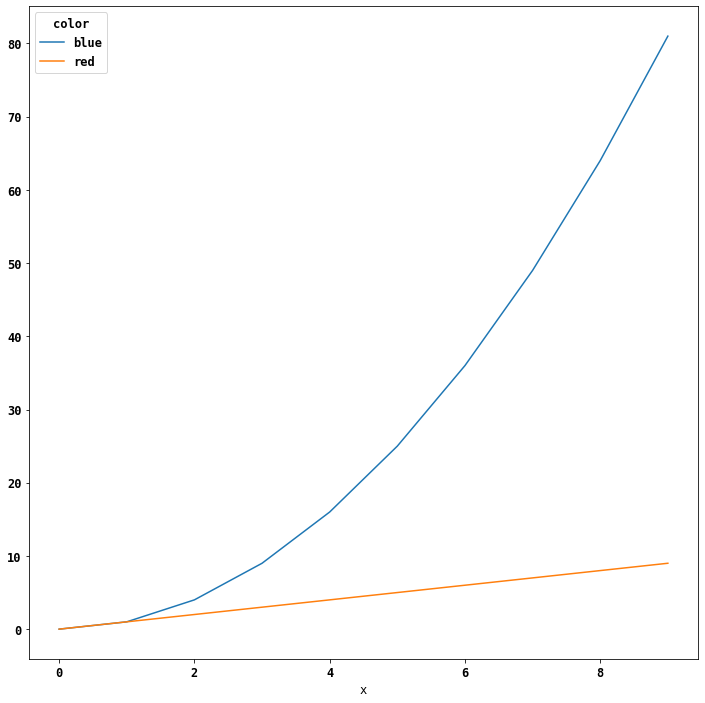

In [24]:
# https://stackoverflow.com/questions/29233283/plotting-multiple-lines-with-pandas-dataframe
df = pd.DataFrame([
    ['red', 0, 0],
    ['red', 1, 1],
    ['red', 2, 2],
    ['red', 3, 3],
    ['red', 4, 4],
    ['red', 5, 5],
    ['red', 6, 6],
    ['red', 7, 7],
    ['red', 8, 8],
    ['red', 9, 9],
    ['blue', 0, 0],
    ['blue', 1, 1],
    ['blue', 2, 4],
    ['blue', 3, 9],
    ['blue', 4, 16],
    ['blue', 5, 25],
    ['blue', 6, 36],
    ['blue', 7, 49],
    ['blue', 8, 64],
    ['blue', 9, 81],
], columns=['color', 'x', 'y'])

df = df.pivot(index='x', columns='color', values='y')

df.plot()